In [1]:
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import multiprocessing
import sys
import cartopy.feature as cfeature
import cmaps
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import xarray as xr
from cartopy import crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 专门提供经纬度的
from cartopy.util import add_cyclic_point
from matplotlib import gridspec
from matplotlib import ticker
from matplotlib.pyplot import quiverkey
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import filters
from toolbar.significance_test import corr_test
from toolbar.TN_WaveActivityFlux import TN_WAF_3D
from toolbar.curved_quivers.modplot import *

In [3]:
lon = xr.open_dataset(r"E:\data\self\q1_1961-2024.nc").lon
lat = xr.open_dataset(r"E:\data\self\q1_1961-2024.nc").lat

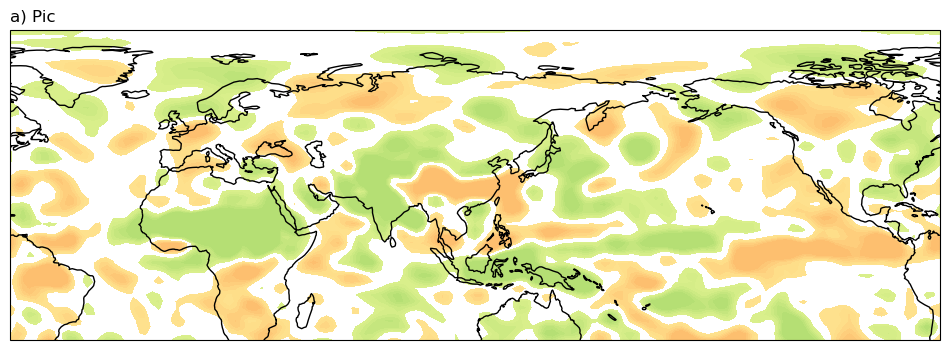

In [13]:
var = np.load(r"D:\PyFile\paper1\cache\q1\reg_q500_same.npy")

fig = plt.figure(figsize=(12, 6))
lev = np.array([-.4, -.35, -.3, -.25, -.2, -.15, -.1, .1, .15, .2, .25, .3, .35, .4])*.5
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180-67.5))
ax.set_title('a) Pic', loc='left')
ax.coastlines()
ax.set_extent([-180, 180, -30, 90], crs=ccrs.PlateCarree())
var_corr, var_lon = add_cyclic_point(var, coord=lon)
ax.contourf(var_lon, lat, var_corr, levels=lev, extend='both', transform=ccrs.PlateCarree(), cmap=cmaps.MPL_RdYlGn[32+10:56] + cmaps.CBR_wet[0] + cmaps.MPL_RdYlGn[72:96-10])